# Observable market quality dimensions
---

This notebook presents an applied example of the calculation of intraday market quality parameters. As an illustration, we will perform the developed code on the Ecopetrol (ECOPETL) regular stock. The results are presented as follows:

**I. Calculations**
 1. Price calculations
 2. Market depth
 3. Order flow
 4. Volatility, spread and total volume

**II. Data resampling**

**III. Visualization**

 1. Log-depth
 2. Volatility
 3. Spread
 4. Volume

## I. Calculations

In [1]:
# We bring the functions previously defined in the preprocessing pipeline 

from PreprocessPipeline import *

import pandas as pd
import os

In [2]:
# Data importation

# File path
PATH = os.getcwd() + "/datos completos.csv"

data = pd.read_csv(PATH, parse_dates=[2], sep=',', na_values='NA',low_memory=False)

# Checking our data
data.head()

,Unnamed: 0,name,times,type,value,size,condcode
0,1,BBVACOL CB Equity,2017-03-03 09:30:00,BID,0.0,0.0,NaN
1,2,BBVACOL CB Equity,2017-03-03 09:30:00,ASK,0.0,0.0,NaN
2,3,BBVACOL CB Equity,2017-03-03 09:30:00,ASK,295.0,30890.0,NaN
3,4,BBVACOL CB Equity,2017-03-03 09:30:00,ASK,295.0,75244.0,NaN
4,5,BBVACOL CB Equity,2017-03-03 09:30:00,BID,255.0,17660.0,NaN


## 1. Price calculations
---

The bid, ask and mid prices, as well as the quoted spread, are initialized at the same time. This is due to the easy coupling of the calculations to the preprocessing pipeline of the inital database (see `PreprocessPipline.ipynb` for more details).

**Bid and ask prices**

At time $t$, the bid and ask prices of an asset will be denoted as $b_t$ and $a_t$ respectively. These prices correspond to the values at which market agents buy or sell an asset in the secondary market.

**Mid-price**

There are several academic discussions about the formation of an asset's true market price. In this work, we will assume the market price as being the mid point between the best bid price and the best ask price:

$$M_t = \frac{1}{2}(a_t+b_t)$$

**Quoted spread**

The quoted spread (QS) is defined as the price gap which a buyer/seller must cross in order to aggresively execute a trade order. In this sense, QS defines the medium distance between the bid and ask prices, normalized by the asset's mid-price.

$$QS_t = \frac{a_t-b_t}{2M_t}$$

In [3]:
# We begin applying the preprocessing pipeline
prep_data = StockPreprocessing(data, "ECOPETL")

prep_data.head()

,nombre,date_time,tipo,precio,volumen,dia,BID,ASK,Mid_Price,Quoted_Spread
date_time,,,,,,,,,,
2017-03-03 09:30:00,ECOPETL CB Equity,2017-03-03 09:30:00,ASK,1320.0,360000.0,2017-03-03,0.0,1320.0,660.0,2.000000
2017-03-03 09:30:00,ECOPETL CB Equity,2017-03-03 09:30:00,BID,1305.0,100000.0,2017-03-03,1305.0,1320.0,1312.5,0.011429
2017-03-03 09:30:02,ECOPETL CB Equity,2017-03-03 09:30:02,ASK,1315.0,80000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634
2017-03-03 09:30:03,ECOPETL CB Equity,2017-03-03 09:30:03,ASK,1315.0,155240.0,2017-03-03,1305.0,1315.0,1310.0,0.007634
2017-03-03 09:30:12,ECOPETL CB Equity,2017-03-03 09:30:12,BID,1305.0,170000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634


## 3. Cálculo de profundidades
---
La profundidad mide la cantidad de activos que están disponibles para transar. En este trabajo, calculamos las profundidades que están disponibles:
 * Para comprar: *bid-depth* 
  * $q_t^b$
 * Para vender *ask-depth* 
  * $q_t^a$
 * Profundidad total 
  * $DP_t = q_t^b + q_t^b$
 
Generalmente, es más simple trabajar con la log-profundidad total, la cual se define como: 

$$\ln(DP_t) = \ln(q_t^a) + \ln(q_t^b)$$

## 2. Market depth
---

Market depth is a measure of how many assets are available for trading. In this project we calculate:
 * Buying depth, or *bid depth*:
  * $q_t^b$
 * Sell depth, or *ask depth*:
  * $q_t^a$
 * Total depth
  * DP_t = $q_t^b + q_t^a$

In [4]:
# Calculamos bid-depth y ask-depth
#depth_data = %time StockDepth(prep_data)
depth_data = pd.read_csv("depth_data.csv")

In [5]:
# Visualizamos los resultados
depth_data.head()

,date_time,nombre,date_time.1,tipo,precio,volumen,BID,ASK,Mid_Price,Quoted_Spread,dia,BID_depth,ASK_depth,Depth,log_depth
0,2017-03-03 09:30:00,ECOPETL CB Equity,2017-03-03 09:30:00,ASK,1320.0,360000.0,NaN,NaN,NaN,NaN,2017-03-03,0.0,0.0,0.0,0.000000
1,2017-03-03 09:30:00,ECOPETL CB Equity,2017-03-03 09:30:00,BID,1305.0,100000.0,1305.0,1320.0,1312.5,0.011429,2017-03-03,100000.0,360000.0,460000.0,24.306785
2,2017-03-03 09:30:02,ECOPETL CB Equity,2017-03-03 09:30:02,ASK,1315.0,80000.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,100000.0,80000.0,180000.0,22.802707
3,2017-03-03 09:30:03,ECOPETL CB Equity,2017-03-03 09:30:03,ASK,1315.0,155240.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,100000.0,235240.0,335240.0,23.881287
4,2017-03-03 09:30:12,ECOPETL CB Equity,2017-03-03 09:30:12,BID,1305.0,170000.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,270000.0,235240.0,505240.0,24.874539


## 4. Dirección de la transacción
---
Podemos determinar la partida que inicia la transacción. Comparando el precio medio con el precio ofrecido, podemos encontrar si la orden es emitida por un comprador o un vendedor. Esto es llamado la dirección de transacción $D$, la cual será:

 * $D=+1$: La transacción es iniciada por el comprador
 * $D=-1$: La transacción es iniciada por el vendedor

In [6]:
# Calculamos quien inicia la transaccion
init_party = InitiatingParty(depth_data)

# Visualizamos los resultados
init_party.head()

,date_time,nombre,date_time.1,tipo,precio,volumen,BID,ASK,Mid_Price,Quoted_Spread,dia,BID_depth,ASK_depth,Depth,log_depth,iniciado
6,2017-03-03 09:30:14,ECOPETL CB Equity,2017-03-03 09:30:14,TRADE,1315.0,2000.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,270000.0,386480.0,656480.0,25.371013,1
8,2017-03-03 09:30:22,ECOPETL CB Equity,2017-03-03 09:30:22,TRADE,1305.0,1000.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,1000.0,1000.0,2000.0,13.815511,-1
12,2017-03-03 09:30:40,ECOPETL CB Equity,2017-03-03 09:30:40,TRADE,1305.0,1351.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,1351.0,1351.0,2702.0,14.417201,-1
15,2017-03-03 09:31:00,ECOPETL CB Equity,2017-03-03 09:31:00,TRADE,1305.0,500.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,500.0,500.0,1000.0,12.429216,-1
16,2017-03-03 09:31:00,ECOPETL CB Equity,2017-03-03 09:31:00,TRADE,1305.0,500.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,500.0,500.0,1000.0,12.429216,-1


## 5. Order flow
---
El order flow es un proxy de la demanda neta de un activo. Este parámetro mide la diferencia entre el número de *shares* compradas agresivamente y el número de *shares* vendidas agresivamente. De esta manera, el *order flow* nos indica si un activo está siendo más comprado o más vendido en un mercado.

In [7]:
# Calculamos los parametros de impacto
impact_params = ImpactParameters(init_party)

# Visualizamos los resultados
impact_params.head()

,date_time,nombre,date_time.1,tipo,precio,volumen,BID,ASK,Mid_Price,Quoted_Spread,dia,BID_depth,ASK_depth,Depth,log_depth,iniciado,delta_p,order_flow
6,2017-03-03 09:30:14,ECOPETL CB Equity,2017-03-03 09:30:14,TRADE,1315.0,2000.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,270000.0,386480.0,656480.0,25.371013,1,NaN,2000.0
8,2017-03-03 09:30:22,ECOPETL CB Equity,2017-03-03 09:30:22,TRADE,1305.0,1000.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,1000.0,1000.0,2000.0,13.815511,-1,-10.0,-1000.0
12,2017-03-03 09:30:40,ECOPETL CB Equity,2017-03-03 09:30:40,TRADE,1305.0,1351.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,1351.0,1351.0,2702.0,14.417201,-1,0.0,-1351.0
15,2017-03-03 09:31:00,ECOPETL CB Equity,2017-03-03 09:31:00,TRADE,1305.0,500.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,500.0,500.0,1000.0,12.429216,-1,0.0,-500.0
16,2017-03-03 09:31:00,ECOPETL CB Equity,2017-03-03 09:31:00,TRADE,1305.0,500.0,1305.0,1315.0,1310.0,0.007634,2017-03-03,500.0,500.0,1000.0,12.429216,-1,0.0,-500.0


# II. Resampleo de los datos
---
Nos interesa ver el comportamiento intradía de estos parámetros. Para poder reducir el ruido de microestructura y comparar los comportamientos a las diferentes horas, nos sirve resamplear los datos cada cinco minutos. En esta sección, se presentan los cálculos realizados. Para más detalles, ver el notebook `Visualization.ipynb`.

## 6. Log-profundidad
---
Debido al gran volumen de transacciones, se acostumbra utilizar el logaritmo de la profundidad. Todos los parámetros calculados a partir de ahora se presentan como una matriz cuyas columnas corresponden a los valores diarios del parámetro correspondiente. Las filas corresponden a la hora a la cual se mide cada parámetro.

In [10]:
from Visualization import *

In [8]:
## Calculamos la log profundidad
log_depth = get_stock_param(depth_data, "ECOPETL", "log_depth")

# Visualizamos el resultado
log_depth.head()

avg_log_depth                                              \
date_time    2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09   
date_time                                                             
09:30:00      23.136905  23.610273  24.944539  22.622907  22.768997   
09:45:00      25.180204  24.154801  26.135037  24.163186  26.069469   
10:00:00      21.690069  24.960451  26.657847  23.912855  25.852610   
10:15:00      24.736457  22.343832  21.620458  24.288767  25.938135   
10:30:00      23.843704  27.419417  27.111175  25.507820  23.027624   

                                                                  ...  \
date_time 2017-03-10 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ...   
date_time                                                         ...   
09:30:00   25.878359  27.050959  23.018840  21.818696  22.080442  ...   
09:45:00   24.767793  25.071134  23.820101  22.968037  25.511657  ...   
10:00:00   27.247994  25.838211  27.084961  21.439487  25.677521  ...   
10:15:00   24.571055  25.947005  23.812045  21.945298  21.092617  ...   
10:30:00   27.028081  21.960279  19.703406  24.329822  26.577022  ...   

                                                                             \
date_time 2017-08-17 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25   
date_time                                                                     
09:30:00   28.310406  21.916902  23.720218  19.464536  22.681523  27.738225   
09:45:00   23.809783  21.531887  27.093578  19.624070  23.049571  25.608635   
10:00:00   28.360416  20.977852  25.578448  19.584548  26.358420  29.976866   
10:15:00   21.782397  21.123932  25.748117  25.221241  22.062413  27.935154   
10:30:00   25.101033  21.809116  23.019698  26.489090  21.810256  26.305448   

                                                       
date_time 2017-08-28 2017-08-29 2017-08-30 2017-08-31  
date_time                                              
09:30:00   23.868823  26.101691  23.378649  22.814437  
09:45:00   24.338342  25.315178  23.700508  22.334435  
10:00:00   25.253866  23.509080  22.709669  25.113159  
10:15:00   26.505208  29.699876  28.439250  22.274763  
10:30:00   25.749896  24.159333  21.136552  23.554649  

[5 rows x 119 columns]

## 7. Volatilidad
---
La volatilidad es una medida de la magnitud de las fluctuaciones de un precio. Puede interpretarse como el costo de la incertidumbre en el valor de un activo. Debido a la poca profundidad del mercado colombiano, en este trabajo se utiliza la volatilidad basada en rango definida como:

$$RR_{t, i}^{\Delta} = \frac{1}{4\ln(2)}\left[ \ln(H_{t, i}) - \ln(L_{t, i}) \right]$$

donde $H_{t, i}$ y $L_{t, i}$ corresponden a los precios máximos y mínimos en un intervalo de tiempo de longitud $\Delta$.

In [11]:
# Calculamos la volatilidad
volat = get_stock_param(depth_data, "ECOPETL", "Volatilidad diaria")

# Visualizamos el resultado
volat.head()

precio                                                         \
date_time 2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09 2017-03-10   
date_time                                                                     
09:30:00    0.022922   0.033930   0.045498   0.011396   0.011661   0.045845   
09:45:00    0.011396   0.011353   0.011353   0.011396   0.000000   0.011439   
10:00:00    0.011353   0.011396   0.022663   0.011396   0.011707   0.000000   
10:15:00    0.011353   0.011396   0.011353   0.011396   0.000000   0.011483   
10:30:00    0.011310   0.011396   0.000000   0.011310   0.011707   0.011527   

                                                       ...             \
date_time 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ... 2017-08-17   
date_time                                              ...              
09:30:00    0.022835   0.034715   0.011572   0.022835  ...   0.033181   
09:45:00    0.000000   0.023278   0.011572   0.011439  ...   0.000000   
10:00:00    0.011353   0.023368   0.000000   0.011439  ...   0.011019   
10:15:00    0.011353   0.011661   0.000000   0.022922  ...   0.000000   
10:30:00    0.011353   0.011661   0.011572   0.011483  ...   0.010979   

                                                                             \
date_time 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25 2017-08-28   
date_time                                                                     
09:30:00    0.022080   0.011019   0.010979   0.010979   0.011019   0.022161   
09:45:00    0.011019   0.021999   0.011019   0.010939   0.011019   0.011142   
10:00:00    0.000000   0.010979   0.000000   0.010939   0.000000   0.011184   
10:15:00    0.011019   0.010979   0.011019   0.010939   0.010979   0.022326   
10:30:00    0.011019   0.010979   0.021918   0.000000   0.000000   0.011142   

                                            
date_time 2017-08-29 2017-08-30 2017-08-31  
date_time                                   
09:30:00    0.011184   0.022326   0.011101  
09:45:00    0.022409   0.000000   0.000000  
10:00:00    0.011184   0.011142   0.011101  
10:15:00    0.000000   0.011142   0.000000  
10:30:00    0.011184   0.011142   0.011101  

[5 rows x 119 columns]

## 8. Spread

In [12]:
# Calculamos el spread
spread = get_stock_param(depth_data, "ECOPETL", "Spread")

# Visualizamos el resultado
spread.head()

Quoted_Spread                                              \
date_time    2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09   
date_time                                                             
09:30:00       0.005478   0.004877   0.004529   0.004438   0.005527   
09:45:00       0.004556   0.004006   0.004495   0.003795   0.004241   
10:00:00       0.003869   0.004229   0.004651   0.003795   0.004882   
10:15:00       0.004903   0.004608   0.003781   0.004160   0.003993   
10:30:00       0.004185   0.003909   0.003781   0.004106   0.003899   

                                                                  ...  \
date_time 2017-03-10 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ...   
date_time                                                         ...   
09:30:00    0.005264   0.004221   0.005496   0.004079   0.004808  ...   
09:45:00    0.003810   0.004464   0.004354   0.004977   0.004255  ...   
10:00:00    0.005594   0.003975   0.004513   0.003854   0.003810  ...   
10:15:00    0.003824   0.003978   0.004393   0.003854   0.003921  ...   
10:30:00    0.003905   0.003781   0.004216   0.004138   0.003824  ...   

                                                                             \
date_time 2017-08-17 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25   
date_time                                                                     
09:30:00    0.004667   0.004604   0.005455   0.004038   0.004294   0.004281   
09:45:00    0.003670   0.003669   0.003784   0.005069   0.004739   0.003722   
10:00:00    0.003670   0.005694   0.003811   0.003670   0.004705   0.003893   
10:15:00    0.003670   0.006078   0.003656   0.004455   0.004146   0.003717   
10:30:00    0.003660   0.004693   0.003656   0.003646   0.003643   0.003877   

                                                       
date_time 2017-08-28 2017-08-29 2017-08-30 2017-08-31  
date_time                                              
09:30:00    0.003733   0.003872   0.004000   0.003697  
09:45:00    0.003734   0.004687   0.003711   0.003697  
10:00:00    0.004324   0.004782   0.003711   0.003688  
10:15:00    0.003751   0.003761   0.003711   0.003748  
10:30:00    0.003711   0.004525   0.003711   0.004672  

[5 rows x 119 columns]

## 9. Volumen

In [14]:
# Calculamos el volumen
volume = get_stock_param(depth_data, "ECOPETL", "Log-volumen")

# Visualizamos el resultado
volume.head()

date_time,2017-03-03,2017-03-06,2017-03-07,2017-03-08,2017-03-09,2017-03-10,2017-03-13,2017-03-14,2017-03-15,2017-03-16,...,2017-08-17,2017-08-18,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-28,2017-08-29,2017-08-30,2017-08-31
date_time,,,,,,,,,,,,,,,,,,,,,
09:30:00,11.784882,13.480703,14.684590,12.639111,12.542927,13.252484,13.756823,13.704729,13.625571,13.754265,...,14.284561,11.099922,12.942787,10.771659,11.218219,14.132757,14.377181,13.383960,13.705510,11.657883
09:45:00,13.048751,13.509140,11.910083,13.455557,13.366087,12.846591,12.463660,13.761402,10.616388,13.665369,...,9.259226,10.186295,13.082566,10.366781,10.768485,12.435202,15.514273,13.453256,11.959846,12.008968
10:00:00,12.176469,11.673530,12.314003,12.477221,12.737615,11.225257,13.739612,13.277281,8.148735,11.128865,...,11.653565,10.688051,13.575292,10.115004,11.015131,13.349673,14.180009,11.520775,12.038665,13.022835
10:15:00,13.251780,12.475775,12.741489,12.230512,9.606428,12.732365,12.219546,11.842164,9.596147,12.729821,...,10.066116,10.696638,10.085851,11.719525,13.877416,13.178436,14.609371,9.808132,10.116621,13.252147
10:30:00,12.634629,8.272826,11.191356,12.136192,13.206706,12.952424,12.270614,11.826999,13.998911,11.782128,...,12.881226,10.389918,11.794421,13.219570,12.308679,14.149581,13.317175,12.480362,12.257797,14.658611


# III. Visualización
---
Podemos obtener una representación gráfica de los resultados de log-profundidad, volatilidad, spread y volumen con la función `graph()`. Esta función toma como parámetros los datos, el ticker de la acción y el parámetro que nos interesa.

En esta sección presentamos las gráficas de log-profundidad, volatilidad, spread y volumen respectivamente.

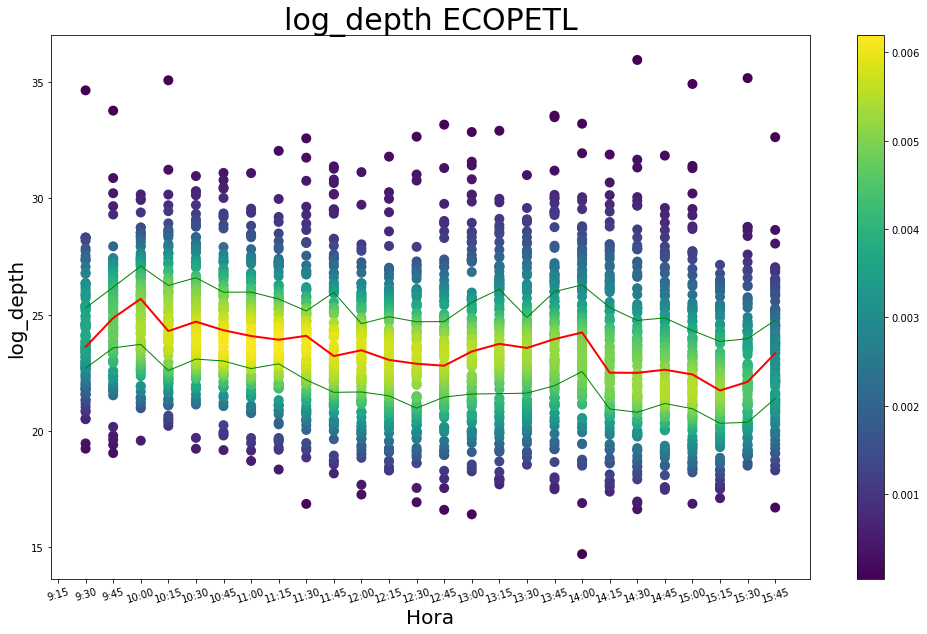

In [15]:
graph(depth_data, "ECOPETL", "log_depth")

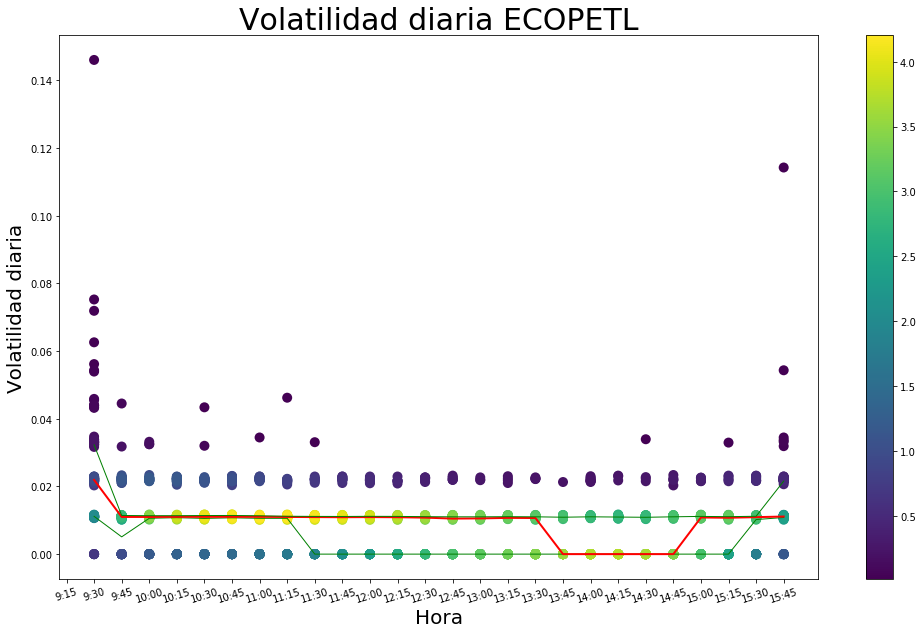

In [16]:
graph(depth_data, "ECOPETL", "Volatilidad diaria")

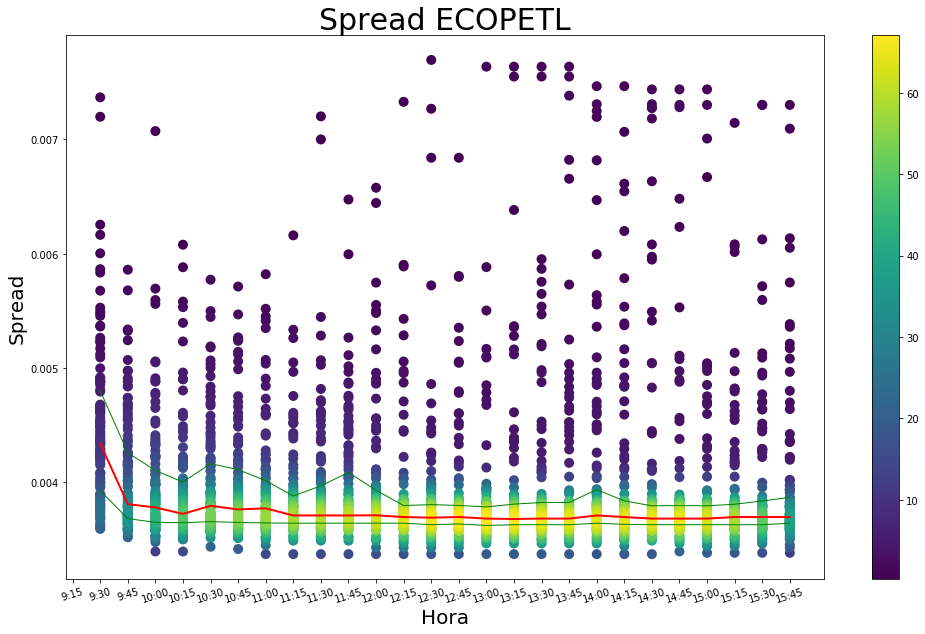

In [17]:
graph(depth_data, "ECOPETL", "Spread")

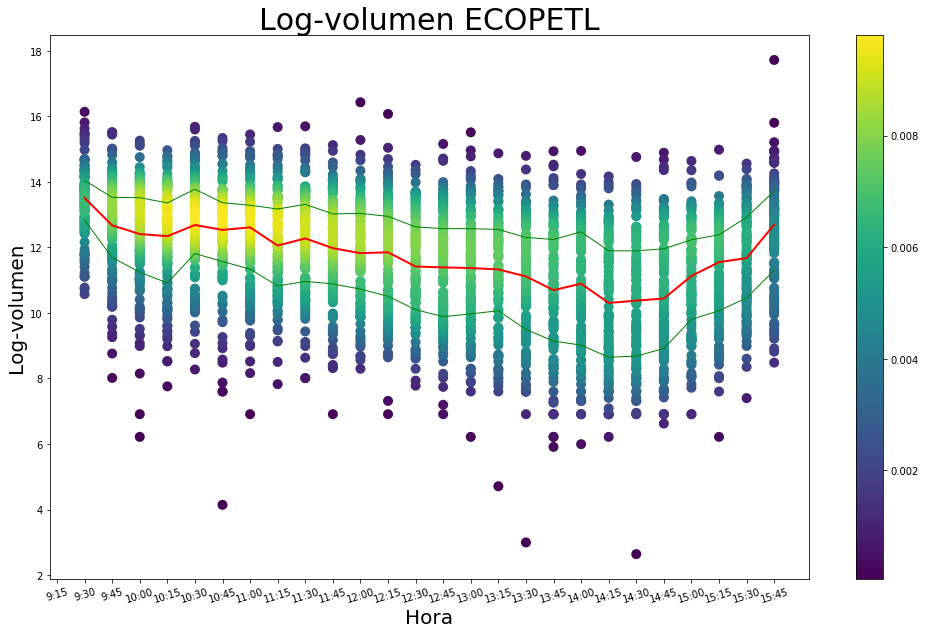

In [18]:
graph(depth_data, "ECOPETL", "Log-volumen")